<a href="https://colab.research.google.com/github/kay-squared/PyTorchLearn/blob/main/04_pytorch_CustomDatasets_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datsets Vidwo Notebook

**Reources:**
* Book version: https://www.learnpytorch.io/04_pytorch_custom_datasets/
* github repo: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/04_pytorch_custom_datasets.ipynb
* Discussions on : https://github.com/mrdbourke/pytorch-deep-learning/discussions

We have used some datasets on Pytorch before, but how to you get your own data into Pytorch?

## Domain libraries
Depending on your problem (test, imiages, audio...), you may want to look into each of the PyTorch existinign data loading functions and customizable data loading functions

# 0. Import and set up device agnostic code


In [2]:
import torch
from torch import nn
torch.__version__

'1.13.1+cu116'

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Download some data
* We will build food vision mini. SO get food dataset. Go to torchvision and check out datasets
* Use the Food181 data set of torchvision, but make it smaller
* find a Notebook which does so here: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb
* but the data are also provided on the deep learning repo of the course: https://github.com/mrdbourke/pytorch-deep-learning/tree/main/data so we will be using this


In [4]:
# Get dataset from github
import requests
import zipfile
from pathlib import Path 

# setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# make diretory if does not exist
if image_path.is_dir():
  print(f"{image_path} directory already exists ... Skipping download. ")
else:
  print(f"{image_path} does not exist, creatinig path.")
  image_path.mkdir(parents=True, exist_ok=True)

# download data into data path (raw link adress!)
with open(data_path / "pizza_steak_sushi.zip","wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print(f"Downloading Pizza Steak and Sushi data")
  f.write(request.content)

# unzip it into image path
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip","r") as zip_ref:
  print(f"Unzipping Pizza Steak and Sushi data.")
  zip_ref.extractall(image_path)


data/pizza_steak_sushi does not exist, creatinig path.
Unzipping Pizza Steak and Sushi data.


## 2. Data preparation and exploratioin

In [5]:
# walking through directory (standard imiage classification data)
import os
def walk_through_data(dir_path):
  """ Walks through dir_path and returns its content """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [6]:
walk_through_data(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza


In [7]:
# Set up train and test paths - THIS IS STANDARD SETUP (there may also be a validation path)
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualize image
1. Get all image paths
2. Pick a random image path using Pzthons random.choise()
3. Get the image class name using "pathlib.Path.parent.stem"
4. Open miage with python PIL
5. Show image and print metadata


Have a look at https://pytorch.org/vision/stable/utils.html. - there are tons of ways to manipuate and do stuff with images (including segementation adn bounding boxes)

In [8]:
import random
from PIL import Image

 Random image path: data/pizza_steak_sushi/train/sushi/773725.jpg
Image Class: sushi
Image height: 512
Image width: 382


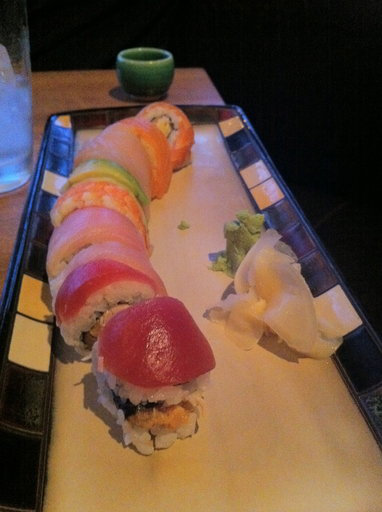

In [19]:
#random.seed(42)

# 1. Get image paths (all of them)
image_path_list = list ( image_path.glob("*/*/*.jpg") ) # mirrors depth of directory tree> test train / pizza steak sushi / jpg
#image_path_list

# 2. pick a random image
random_image_path = random.choice(image_path_list)
random_image_path

# 3. Get image class by looking at the name of the parent directory
image_class = random_image_path.parent.stem
image_class

# 4. use PIL  Image class to opem image
img = Image.open(random_image_path)

# 5. Print metadata
print(f" Random image path: {random_image_path}")
print(f"Image Class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")

img

#

(-0.5, 381.5, 511.5, -0.5)

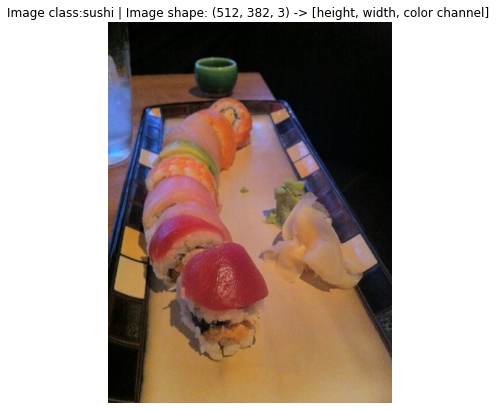

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# to plot with matplotlib, need to convert to numpy array
img_as_array = np.asarray(img)
plt.figure(figsize=(10,7))

plt.imshow(img_as_array)
plt.title(f"Image class:{image_class} | Image shape: {img_as_array.shape} -> [height, width, color channel] ")
plt.axis(False)


# not that PIL has color channel last!!! unlike pytorch